# Import software libraries

In [1]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 1.19.2
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0


# Read and examine the data

In [2]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 

df = pd.read_pickle('data/online_history_cleaned.pickle')

# Preview the first five rows of the data.

print(df.head())

  Invoice StockCode  Quantity         InvoiceDate  Price CustomerID  \
0  536365    85123A         6 2010-12-01 08:26:00   2.55      u1785   
1  536367     84879        32 2010-12-01 08:34:00   1.69     u13047   
2  536373    85123A         6 2010-12-01 09:02:00   2.55      u1785   
3  536375    85123A         6 2010-12-01 09:32:00   2.55      u1785   
4  536378     20725        10 2010-12-01 09:37:00   1.65     u14688   

          Country  TotalAmount                         Description  
0  United Kingdom        15.30  CREAM HANGING HEART T-LIGHT HOLDER  
1  United Kingdom        54.08       ASSORTED COLOUR BIRD ORNAMENT  
2  United Kingdom        15.30  CREAM HANGING HEART T-LIGHT HOLDER  
3  United Kingdom        15.30  CREAM HANGING HEART T-LIGHT HOLDER  
4  United Kingdom        16.50             LUNCH BAG RED RETROSPOT  


In [3]:
# Get the shape of the data.

df.shape

(15206, 9)

In [4]:
# Get the data types for every column in the DataFrame.

column_data_types = df.dtypes
print("Data types for every column:")
print(column_data_types)

Data types for every column:
Invoice                object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID             object
Country                object
TotalAmount           float64
Description            object
dtype: object


# Generate summary statistics for all of the data

In [5]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
# Be sure to include all variables, including categorical ones.

summary_statistics = df.describe(include='all')

# Print the summary statistics
print("Summary statistics:")
print(summary_statistics)

Summary statistics:
       Invoice StockCode      Quantity          InvoiceDate         Price  \
count    15206     15206  15206.000000                15206  15194.000000   
unique    8315        10           NaN                 8022           NaN   
top     536876    85123A           NaN  2011-05-10 15:07:00           NaN   
freq        10      2163           NaN                   10           NaN   
first      NaN       NaN           NaN  2010-12-01 08:26:00           NaN   
last       NaN       NaN           NaN  2011-12-09 12:31:00           NaN   
mean       NaN       NaN     16.775483                  NaN      4.164267   
std        NaN       NaN     79.496270                  NaN      4.377605   
min        NaN       NaN      1.000000                  NaN      0.400000   
25%        NaN       NaN      2.000000                  NaN      1.650000   
50%        NaN       NaN      6.000000                  NaN      2.550000   
75%        NaN       NaN     12.000000                  

# Plot a bar chart for the average price per item

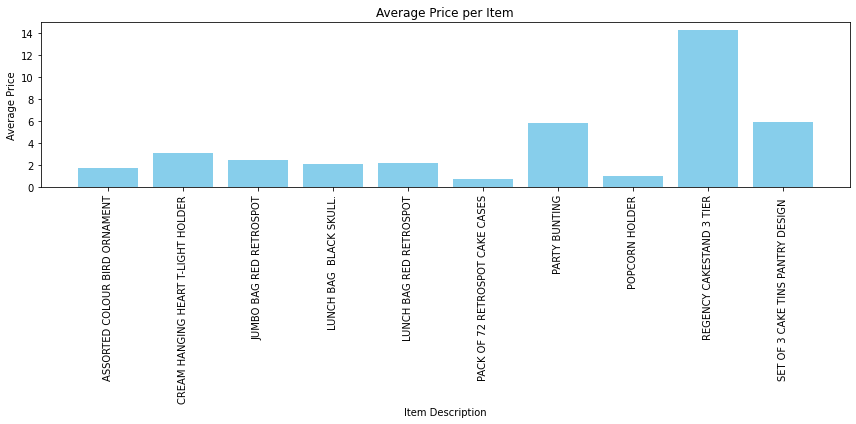

In [6]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.

average_price_per_item = df.groupby('Description')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))  
plt.bar(average_price_per_item['Description'], average_price_per_item['Price'], color='skyblue')
plt.title('Average Price per Item')
plt.xlabel('Item Description')
plt.ylabel('Average Price')
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

# Explore the distribution of the numeric variable `Price`

In [7]:
# Get a DataFrame of summary statistics for numeric variables only.

numeric_summary = df.describe(include=[np.number])

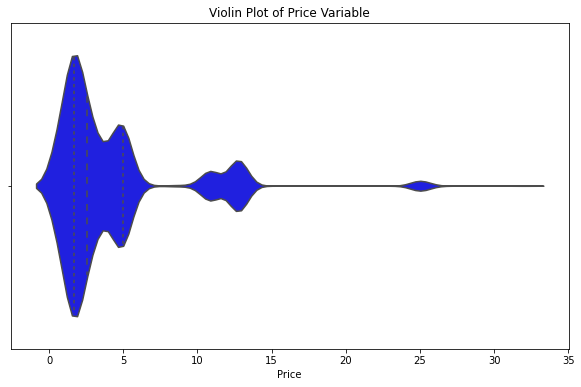

In [8]:
# Generate a violin plot for the "Price" variable.
# Decorate and style the plot however you think is best.

plt.figure(figsize=(10, 6))
sns.violinplot(x='Price', data=df, color='blue', inner='quartiles')

plt.xlabel('Price')
plt.title('Violin Plot of Price Variable')

plt.show()

# Visualize correlations between numeric variables

In [9]:
# Generate a correlation matrix between all numeric variables.

correlation_matrix = df.corr()

print("Correlation Matrix between Numeric Variables:")
print(correlation_matrix)

Correlation Matrix between Numeric Variables:
             Quantity     Price  TotalAmount
Quantity     1.000000 -0.088356     0.745641
Price       -0.088356  1.000000     0.109054
TotalAmount  0.745641  0.109054     1.000000


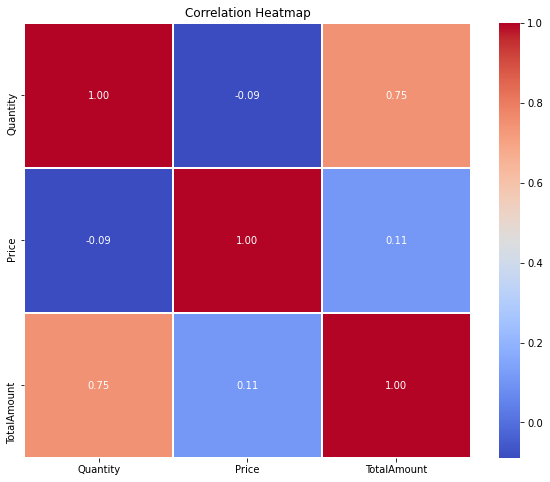

In [10]:
# Visualize the correlations with a heatmap.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

# Transform skewed variables

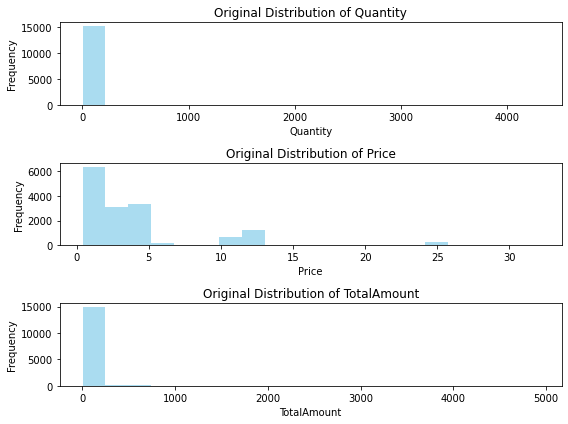

In [11]:
# Plot histograms for the original distributions of all numeric variables.

numeric_columns = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 2 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'Original Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

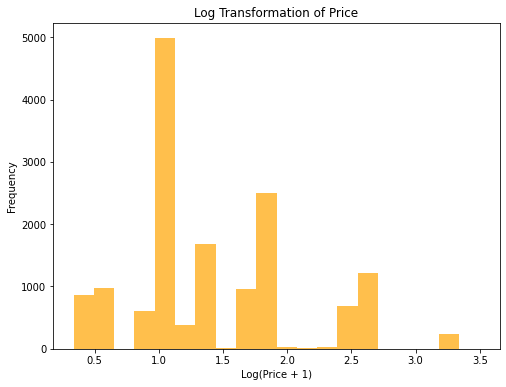

In [12]:
# Plot the log transformation of "Price".

df['Log_Price'] = np.log1p(df['Price'])

plt.figure(figsize=(8, 6))
plt.hist(df['Log_Price'], bins=20, color='orange', alpha=0.7)
plt.title('Log Transformation of Price')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')

plt.show()

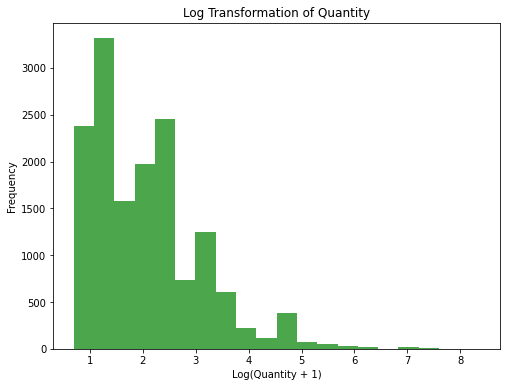

In [13]:
# Plot the log transformation of "Quantity".

df['Log_Quantity'] = np.log1p(df['Quantity'])

plt.figure(figsize=(8, 6))
plt.hist(df['Log_Quantity'], bins=20, color='green', alpha=0.7)
plt.title('Log Transformation of Quantity')
plt.xlabel('Log(Quantity + 1)')
plt.ylabel('Frequency')

plt.show()

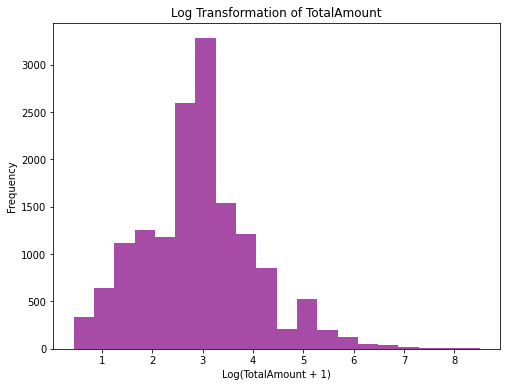

In [14]:
# Plot the log transformation of "TotalAmount".

df['Log_TotalAmount'] = np.log1p(df['TotalAmount'])

plt.figure(figsize=(8, 6))
plt.hist(df['Log_TotalAmount'], bins=20, color='purple', alpha=0.7)
plt.title('Log Transformation of TotalAmount')
plt.xlabel('Log(TotalAmount + 1)')
plt.ylabel('Frequency')

plt.show()

# Analyze time series data

In [15]:
# Obtain the number of invoices by month.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month

invoices_by_month = df.groupby('Month')['Invoice'].nunique()

# Print the number of invoices by month.

print("Number of invoices by month:")
print(invoices_by_month)

Number of invoices by month:
Month
1     502
2     511
3     696
4     602
5     783
6     665
7     667
8     602
9     750
10    713
11    968
12    856
Name: Invoice, dtype: int64


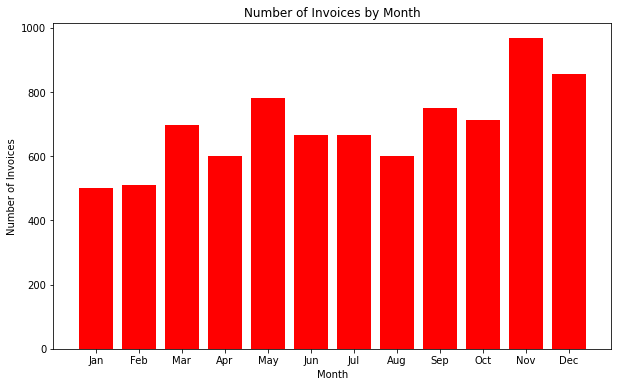

In [16]:
# Use a bar chart to plot the number of invoices by month.

plt.figure(figsize=(10, 6))
plt.bar(invoices_by_month.index, invoices_by_month, color='red')
plt.title('Number of Invoices by Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(invoices_by_month.index, month_names)

plt.show()

# Identify and handle missing data

In [17]:
# Identify any missing data for all variables.

missing_data = df.isna().sum()

In [18]:
# Print the current shape of the data.

print("Current Shape of the Data:", df.shape)

# Remove rows where "CustomerID" is unknown (missing)
df_cleaned = df.dropna(subset=['CustomerID'])

# Print the new shape of the data.

print("New Shape of the Data after Removing Rows with Unknown CustomerID:", df_cleaned.shape)

Current Shape of the Data: (15206, 13)
New Shape of the Data after Removing Rows with Unknown CustomerID: (12435, 13)


In [19]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.

df['Price'].fillna(0, inplace=True)
df['TotalAmount'].fillna(0, inplace=True)

# Confirm there are no longer any missing values.

missing_data = df.isna().sum()
print("Missing Data Counts for Each Variable (After Fillna):")
print(missing_data)

Missing Data Counts for Each Variable (After Fillna):
Invoice               0
StockCode             0
Quantity              0
InvoiceDate           0
Price                 0
CustomerID         2771
Country               0
TotalAmount           0
Description           0
Log_Price            12
Log_Quantity          0
Log_TotalAmount      12
Month                 0
dtype: int64


# One-hot encode the `Description` variable

In [20]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".

description_columns = [column for column in df.columns if column.startswith('Description')]
df = pd.get_dummies(df, columns=description_columns)

# Preview the first five rows of the DataFrame.

df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Log_Price,Log_Quantity,...,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0.989541,3.496508,...,1,0,0,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0.974560,2.397895,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# Concatenate the new encoded columns with the main DataFrame.

df = pd.concat([df, df.iloc[:, 12:]], axis=1)
           
# Drop the original "Description" variable.

df = df.drop(df.filter(like='Description').columns, axis=1)

In [33]:
# Preview the first five rows of the data.

df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Log_Price,Log_Quantity,Log_TotalAmount,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0.989541,3.496508,4.008787,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0.974560,2.397895,2.862201,12


# Identify and remove columns with low variance

In [34]:
# Obtain the standard deviation of each variable.

std_deviation = df.std()

In [38]:
# Define a standard deviation threshold of 0.26.

threshold = 0.26

# Identify any columns that are lower than the threshold.

numeric_columns = df.select_dtypes(include=['number'])
low_std_columns = numeric_columns.columns[numeric_columns.std() < threshold]

# Print the column(s) that will be dropped.

print(low_std_columns)

Index([], dtype='object')


In [39]:
# Drop the column(s) that have low standard deviation from the main dataset.

df = df.drop(low_std_columns, axis=1)

# Preview the first five rows of data.

df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Log_Price,Log_Quantity,Log_TotalAmount,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0.989541,3.496508,4.008787,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,2.791165,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0.974560,2.397895,2.862201,12


# Generate box plots for each numeric variable

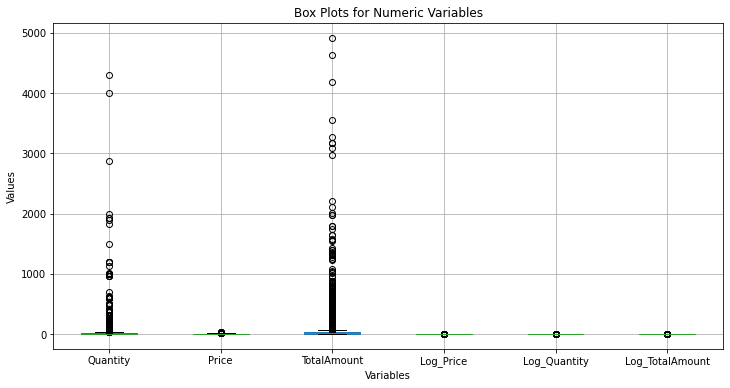

In [40]:
# Draw box plots for each numeric variable.

numeric_variables = ['Quantity', 'Price', 'TotalAmount', 'Log_Price', 'Log_Quantity', 'Log_TotalAmount']
df[numeric_variables].boxplot(figsize=(12, 6))

plt.title('Box Plots for Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.show()

# Identify and remove outliers

In [50]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [51]:
# Identify the shape of the data before removing outliers.

print("Shape of the data before removing outliers:", df.shape)

Shape of the data before removing outliers: (0, 12)


In [70]:
# Call the calc_outliers() function iteratively for each numeric variable.
# For each variable:
#     Remove the outliers that are higher than the upper bounds.
#     Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.

numeric_columns = [column for column in df.columns if df[column].dtype != 'object']

if not df[column].empty:
       df = df[df[column] <= ub]

       df = df[df[column] >= lb]
print(f"Outliers removed for column '{column}'")
new_shape = df.shape
print("Shape of the data after removing outliers:", new_shape)

Outliers removed for column 'Quantity'
Shape of the data after removing outliers: (0, 12)


# Save the final dataset as a pickle file

In [74]:
# Save the final dataset as a pickle file named online_history_cleaned_final.pickle.

import pickle

with open('online_history_cleaned_final.pickle', 'wb') as file:
    pickle.dump(df, file)

print("Cleaned data saved as online_history_cleaned_final.pickle")

Cleaned data saved as online_history_cleaned_final.pickle
